In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./dataset/rohith sharma/rohith sharma 59.jpg')
img.shape

(300, 300, 3)

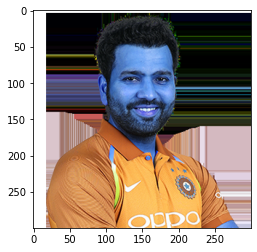

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(300, 300)

In [5]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 205, 205, 205],
       [255, 255, 255, ..., 207, 207, 207],
       [255, 255, 255, ..., 207, 207, 207]], dtype=uint8)

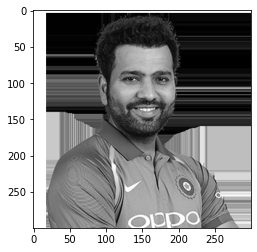

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[100,  51, 112, 112]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(100, 51, 112, 112)

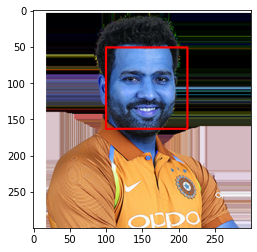

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

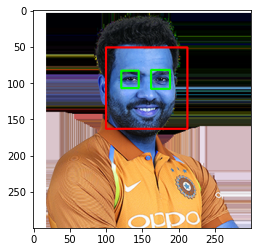

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

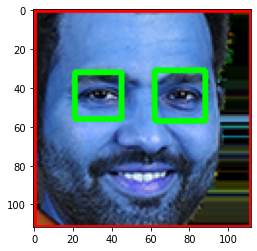

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(112, 112, 3)

In [13]:
#!pip install PyWavelets
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

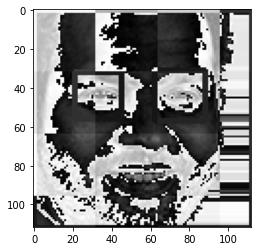

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

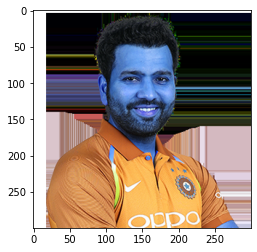

In [16]:
original_image = cv2.imread('./dataset/rohith sharma/rohith sharma 59.jpg')
plt.imshow(original_image)

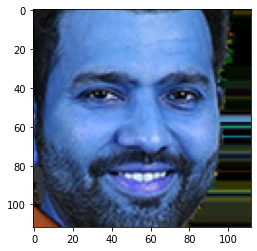

In [17]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/rohith sharma/rohith sharma 59.jpg')
plt.imshow(cropped_image)

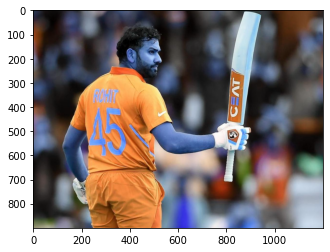

In [18]:
org_image_obstructed = cv2.imread('./dataset/rohith sharma/rohith sharma 116.jpg')
plt.imshow(org_image_obstructed)

In [19]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./dataset/rohith sharma/rohith sharma 116.jpg')
cropped_image_no_2_eyes

In [25]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [26]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
img_dirs

['./dataset/ashwin',
 './dataset/dhoni',
 './dataset/kl rahul',
 './dataset/rahul dravid',
 './dataset/rohith sharma',
 './dataset/virat kohli']

In [28]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [29]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/ashwin
Generating cropped images in folder:  ./dataset/cropped/dhoni
Generating cropped images in folder:  ./dataset/cropped/kl rahul
Generating cropped images in folder:  ./dataset/cropped/rahul dravid
Generating cropped images in folder:  ./dataset/cropped/rohith sharma
Generating cropped images in folder:  ./dataset/cropped/virat kohli


In [30]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ashwin': ['./dataset/cropped/ashwin\\ashwin1.png',
  './dataset/cropped/ashwin\\ashwin10.png',
  './dataset/cropped/ashwin\\ashwin100.png',
  './dataset/cropped/ashwin\\ashwin101.png',
  './dataset/cropped/ashwin\\ashwin102.png',
  './dataset/cropped/ashwin\\ashwin103.png',
  './dataset/cropped/ashwin\\ashwin104.png',
  './dataset/cropped/ashwin\\ashwin105.png',
  './dataset/cropped/ashwin\\ashwin106.png',
  './dataset/cropped/ashwin\\ashwin107.png',
  './dataset/cropped/ashwin\\ashwin108.png',
  './dataset/cropped/ashwin\\ashwin109.png',
  './dataset/cropped/ashwin\\ashwin11.png',
  './dataset/cropped/ashwin\\ashwin110.png',
  './dataset/cropped/ashwin\\ashwin111.png',
  './dataset/cropped/ashwin\\ashwin112.png',
  './dataset/cropped/ashwin\\ashwin113.png',
  './dataset/cropped/ashwin\\ashwin114.png',
  './dataset/cropped/ashwin\\ashwin12.png',
  './dataset/cropped/ashwin\\ashwin13.png',
  './dataset/cropped/ashwin\\ashwin14.png',
  './dataset/cropped/ashwin\\ashwin15.png',
  './dat

In [31]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ashwin': 0,
 'dhoni': 1,
 'kl rahul': 2,
 'rahul dravid': 3,
 'rohith sharma': 4,
 'virat kohli': 5}

In [32]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [33]:
len(X[0])

4096

In [34]:
32*32*3 + 32*32

4096

In [35]:
X[0]

array([[189],
       [134],
       [167],
       ...,
       [239],
       [ 16],
       [247]], dtype=uint8)

In [36]:
y[0]

0

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(593, 4096)

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7248322147651006

In [40]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        28
           1       0.53      0.56      0.54        18
           2       1.00      0.81      0.90        27
           3       0.66      0.84      0.74        25
           4       0.85      0.48      0.61        23
           5       0.75      0.86      0.80        28

    accuracy                           0.72       149
   macro avg       0.74      0.71      0.71       149
weighted avg       0.75      0.72      0.72       149



In [41]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [10,100,1,5,20,25],
            'svc__kernel': ['linear','rbf','poly','sigmoid']
        }  
    },
   
    'random_forest': {
        'model': RandomForestClassifier(random_state=42),
        'params' : {
            'randomforestclassifier__n_estimators': [5,10,100,120,150],
            'randomforestclassifier__max_depth' : [2,4,5,10],
            'randomforestclassifier__min_samples_split' : [1,8,2,4,5,10]
        }
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params' : {
            'decisiontreeclassifier__min_samples_leaf': [1,5,10,8],
            'decisiontreeclassifier__max_depth' : [1,8,5,10],
            'decisiontreeclassifier__min_samples_split' : [1,8,5,10,2,4]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'logisticregression__C': [1,5,10],
            'logisticregression__solver' : ['liblinear','newton-cg','liblinear'],
            'logisticregression__multi_class' : ['auto', 'ovr', 'multinomial'],
            'logisticregression__max_iter' : [100,10,50,120,150,200]
        }
    }
}

In [43]:
%%time
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\ensemble\_for

D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  Convergenc

D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning

D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:

D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  Convergenc

D:\DOWNLOADS\Anconda\envs\imageclassification\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


Wall time: 1h 26min 35s


,model,best_score,best_params
0,svm,0.718565,"{'svc__C': 10, 'svc__kernel': 'linear'}"
1,random_forest,0.655414,"{'randomforestclassifier__max_depth': 10, 'ran..."
2,decision_tree,0.432380,"{'decisiontreeclassifier__max_depth': 10, 'dec..."
3,logistic_regression,0.750077,"{'logisticregression__C': 1, 'logisticregressi..."


In [44]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=10, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(max_depth=10, min_samples_split=5,
                                         n_estimators=120, random_state=42))]),
 'decision_tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(max_depth=10, min_samples_split=5,
                                         random_state=42))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, max_iter=10, solver='newton-cg'))])}

In [45]:
best_estimators['svm'].score(X_test,y_test)

0.7651006711409396

In [46]:
best_estimators['random_forest'].score(X_test,y_test)

0.6510067114093959

In [47]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8187919463087249

In [48]:
best_estimators['decision_tree'].score(X_test,y_test)

0.42953020134228187

In [49]:
best_clf1 = best_estimators['svm']

In [50]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, best_clf1.predict(X_test))
cm1

array([[19,  4,  1,  4,  0,  0],
       [ 3, 11,  1,  3,  0,  0],
       [ 4,  0, 23,  0,  0,  0],
       [ 1,  2,  0, 21,  1,  0],
       [ 3,  2,  1,  2, 15,  0],
       [ 1,  0,  0,  2,  0, 25]], dtype=int64)

Text(69.0, 0.5, 'Truth')

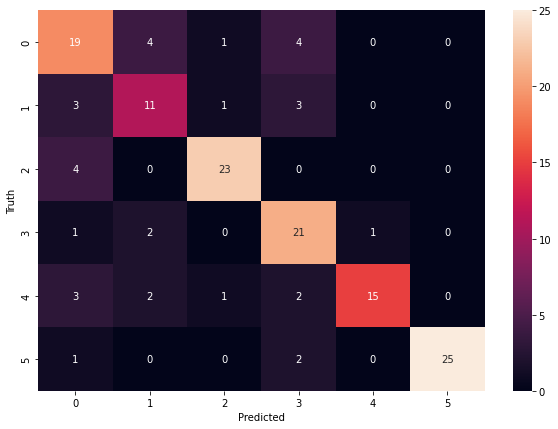

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
best_clf = best_estimators['logistic_regression']

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[21,  4,  1,  2,  0,  0],
       [ 2, 13,  1,  2,  0,  0],
       [ 1,  0, 24,  0,  2,  0],
       [ 0,  1,  0, 22,  2,  0],
       [ 0,  2,  1,  2, 17,  1],
       [ 1,  0,  0,  1,  1, 25]], dtype=int64)

Text(69.0, 0.5, 'Truth')

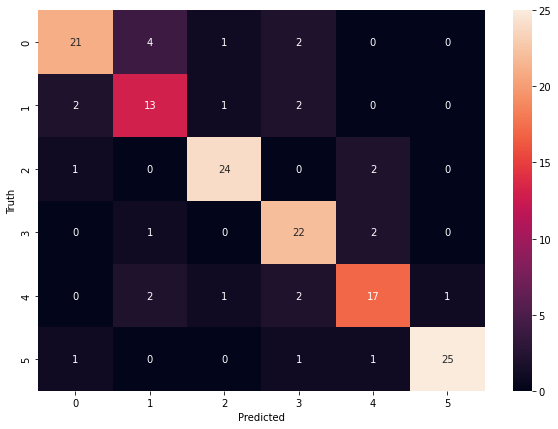

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
class_dict

{'ashwin': 0,
 'dhoni': 1,
 'kl rahul': 2,
 'rahul dravid': 3,
 'rohith sharma': 4,
 'virat kohli': 5}

## RANDOM SERACH CV

In [56]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [57]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))